# Advance House Price Prediction

### All Life Cycle of a Data Science Project

1. Data Analysis
2. Feature Engineering
3. Feature Selection
4. Model Building
5. Model Deployment

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#display all columns in dataframe
pd.pandas.set_option('display.max_columns',None)

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/krishnaik06/Advanced-House-Price-Prediction-/master/train.csv')

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.sample(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1399,1400,50,RL,51.0,6171,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,SWISU,Norm,Norm,1Fam,1.5Fin,6,6,1925,1990,Gable,CompShg,WdShing,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,BLQ,264,Unf,0,712,976,GasA,Ex,Y,SBrkr,1160,448,0,1608,0,0,2,1,3,1,Gd,7,Typ,1,Gd,Detchd,1925.0,Unf,1,216,Fa,TA,Y,147,16,0,0,0,0,NaN,MnPrv,NaN,0,10,2009,WD,Normal,137450
611,612,80,RL,NaN,10395,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NWAmes,Norm,Norm,1Fam,SLvl,6,6,1978,1978,Gable,CompShg,HdBoard,HdBoard,BrkFace,233.0,TA,TA,CBlock,Gd,TA,Av,ALQ,605,Unf,0,427,1032,GasA,TA,Y,SBrkr,1032,0,0,1032,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1978.0,Unf,2,564,TA,TA,Y,0,0,0,0,0,0,NaN,MnPrv,Shed,500,7,2007,WD,Normal,148000
1213,1214,80,RL,NaN,10246,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,Norm,Norm,1Fam,SLvl,4,9,1965,2001,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,Gd,Av,GLQ,648,Unf,0,0,648,GasA,Ex,Y,SBrkr,960,0,0,960,1,1,0,0,0,1,TA,3,Typ,0,NaN,Attchd,1965.0,Unf,1,364,TA,TA,Y,88,0,0,0,0,0,NaN,NaN,NaN,0,5,2006,WD,Normal,145000
950,951,20,RL,60.0,7200,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,8,1950,2002,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,398,BLQ,149,317,864,GasA,Gd,Y,SBrkr,864,0,0,864,1,0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1980.0,RFn,2,720,TA,TA,Y,194,0,0,0,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal,129000
308,309,30,RL,NaN,12342,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,4,5,1940,1950,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,BLQ,262,Unf,0,599,861,GasA,Ex,Y,SBrkr,861,0,0,861,0,0,1,0,1,1,TA,4,Typ,0,NaN,Detchd,1961.0,Unf,2,539,TA,TA,Y,158,0,0,0,0,0,NaN,NaN,NaN,0,3,2009,WD,Normal,82500


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
df.shape

(1460, 81)

### In Data Analysis We will Analyze To Find out the following things


* Missing Values
* All The Numerical Variables
* Distribution of the Numerical Variables
* Categorical Variables
* Cardinality of Categorical Variables
* Outliers
* Relationship between independent and dependent feature(SalePrice)

### Missing Values

In [7]:
#we find all the features that have null values
features_with_na = [features for features in df.columns if df[features].isnull().sum() > 1]

#percentage of missing values in each feature which contain Na
for feature in features_with_na:
    print(feature,"-> ", np.round(df[feature].isnull().mean(), 4), "%  missing values")


LotFrontage ->  0.1774 %  missing values
Alley ->  0.9377 %  missing values
MasVnrType ->  0.0055 %  missing values
MasVnrArea ->  0.0055 %  missing values
BsmtQual ->  0.0253 %  missing values
BsmtCond ->  0.0253 %  missing values
BsmtExposure ->  0.026 %  missing values
BsmtFinType1 ->  0.0253 %  missing values
BsmtFinType2 ->  0.026 %  missing values
FireplaceQu ->  0.4726 %  missing values
GarageType ->  0.0555 %  missing values
GarageYrBlt ->  0.0555 %  missing values
GarageFinish ->  0.0555 %  missing values
GarageQual ->  0.0555 %  missing values
GarageCond ->  0.0555 %  missing values
PoolQC ->  0.9952 %  missing values
Fence ->  0.8075 %  missing values
MiscFeature ->  0.963 %  missing values


In [8]:
#lets see the actual number of missing values
for feature in features_with_na:
    print(feature,"-> ", df[feature].isnull().sum(), "  missing values")

LotFrontage ->  259   missing values
Alley ->  1369   missing values
MasVnrType ->  8   missing values
MasVnrArea ->  8   missing values
BsmtQual ->  37   missing values
BsmtCond ->  37   missing values
BsmtExposure ->  38   missing values
BsmtFinType1 ->  37   missing values
BsmtFinType2 ->  38   missing values
FireplaceQu ->  690   missing values
GarageType ->  81   missing values
GarageYrBlt ->  81   missing values
GarageFinish ->  81   missing values
GarageQual ->  81   missing values
GarageCond ->  81   missing values
PoolQC ->  1453   missing values
Fence ->  1179   missing values
MiscFeature ->  1406   missing values


Since there are so many missing values,let's find the relationship missing values and SalePprice(target variable)

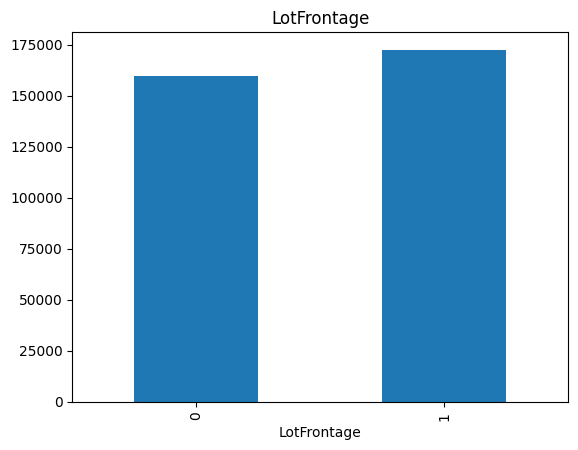

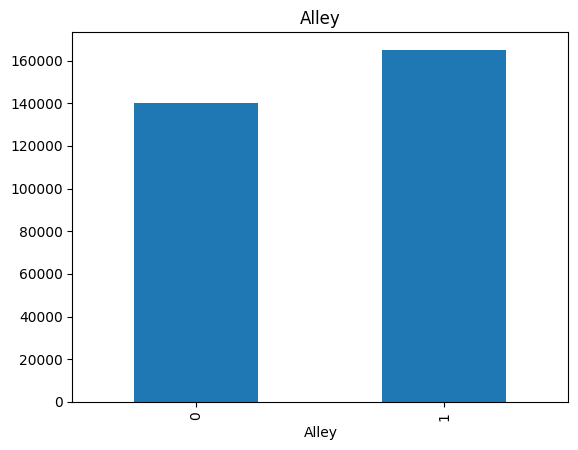

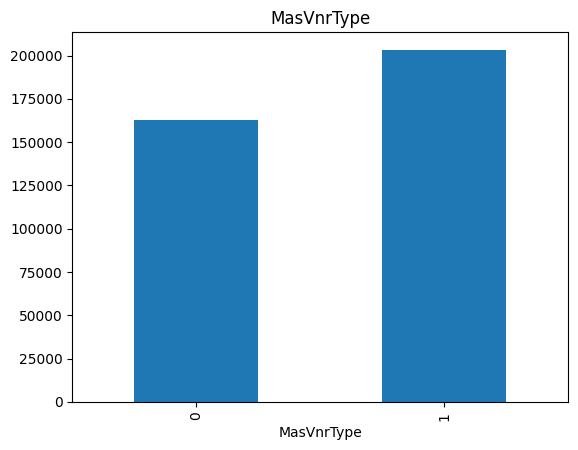

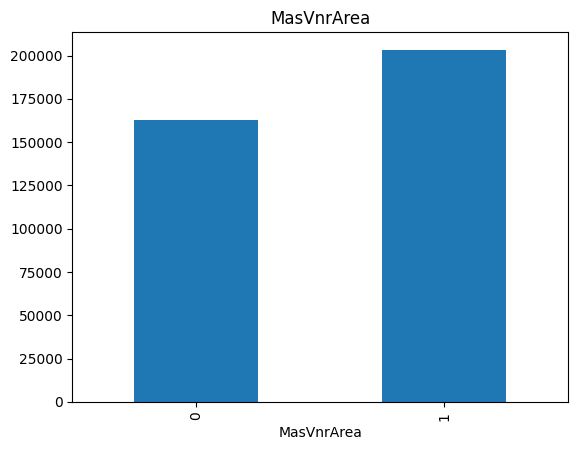

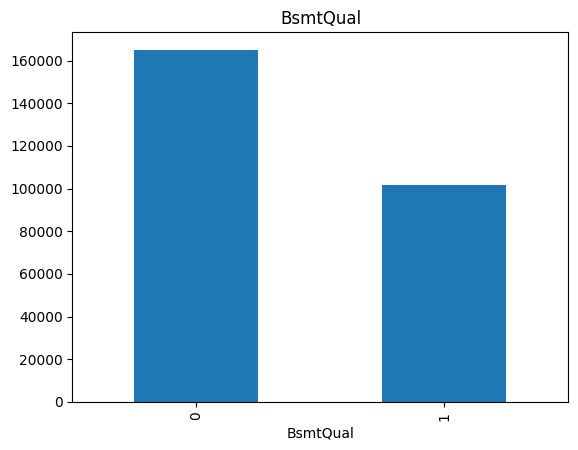

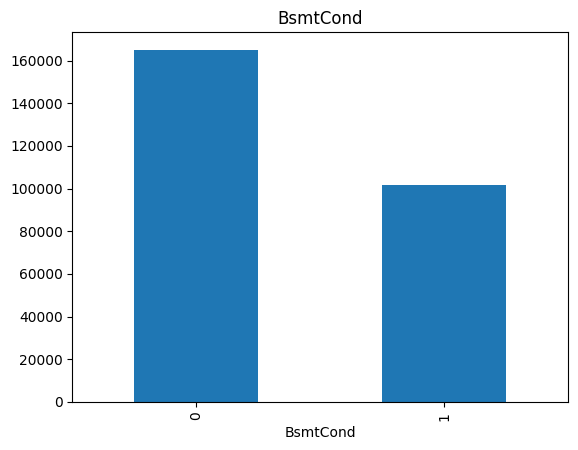

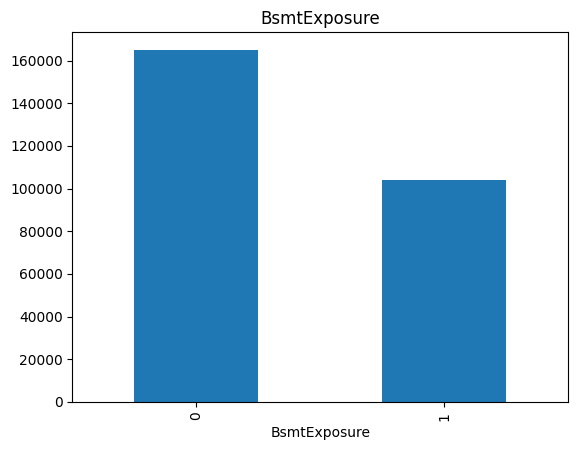

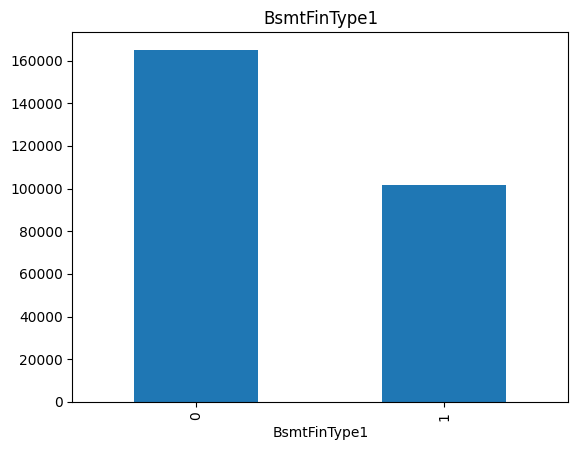

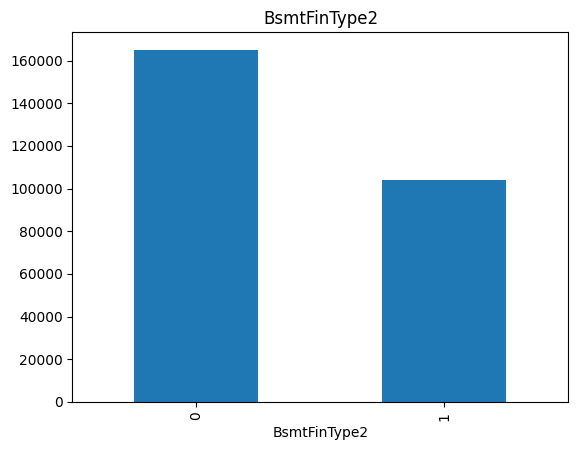

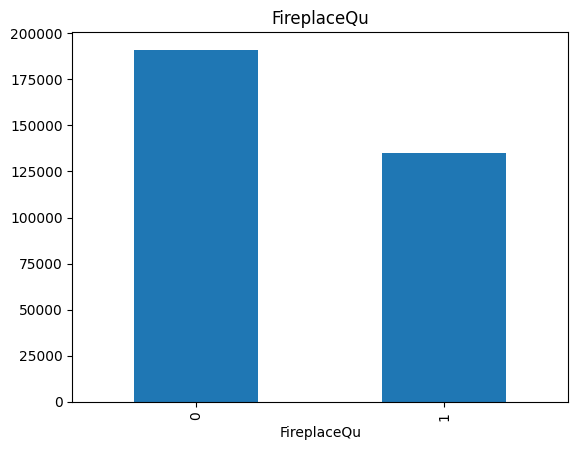

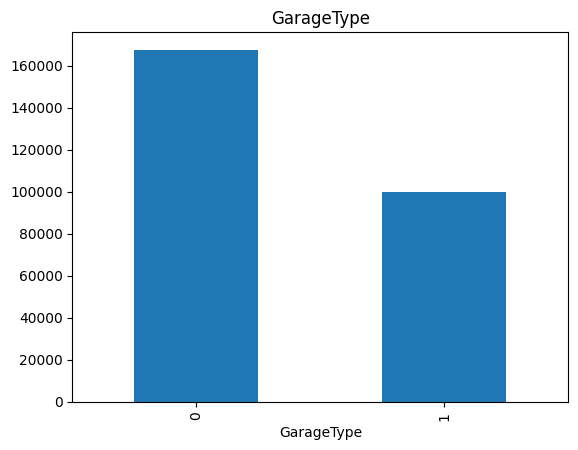

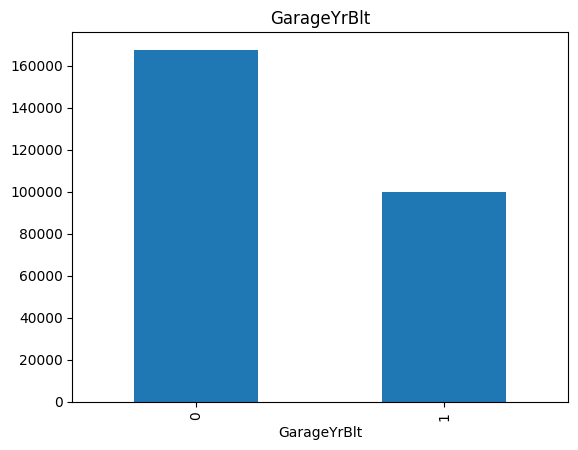

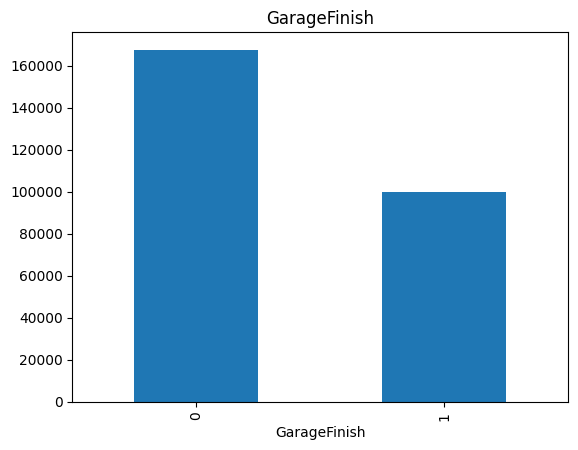

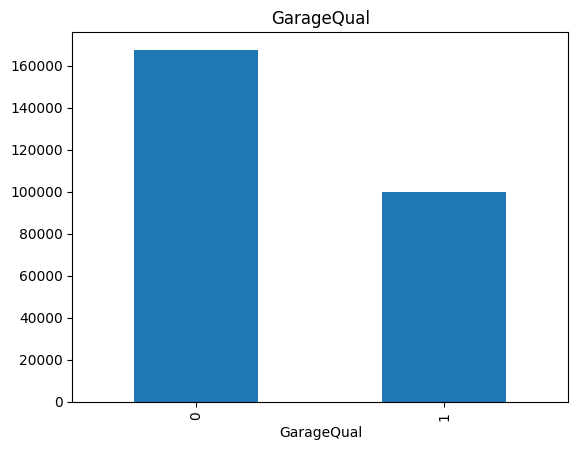

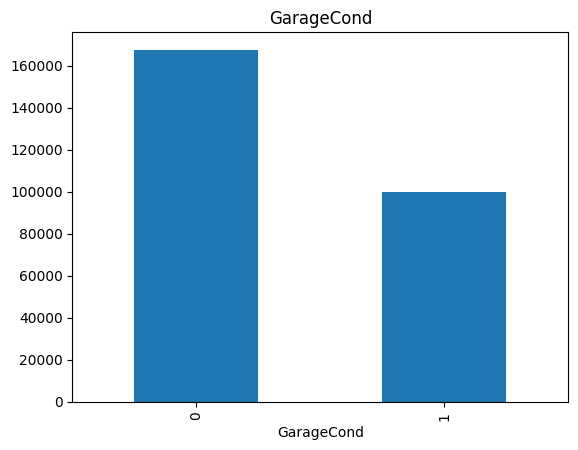

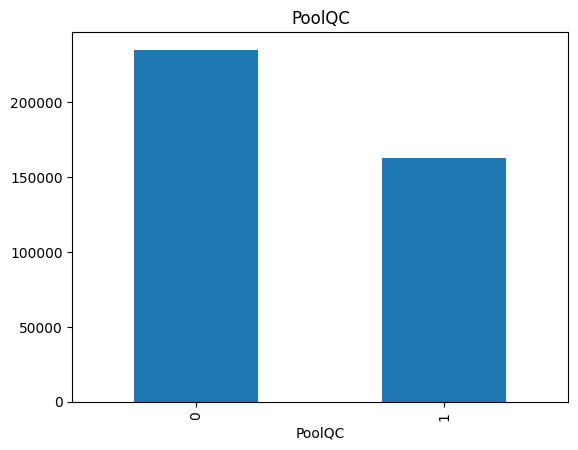

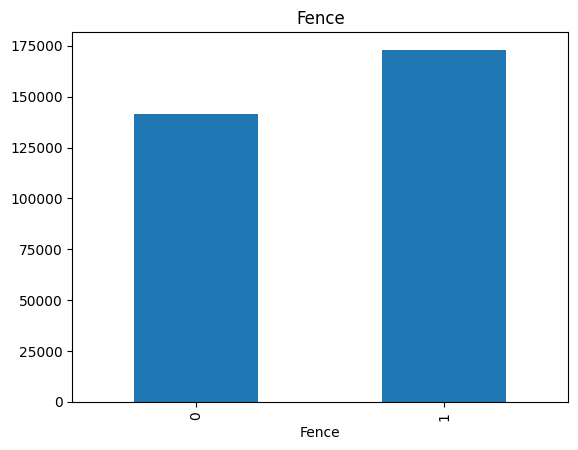

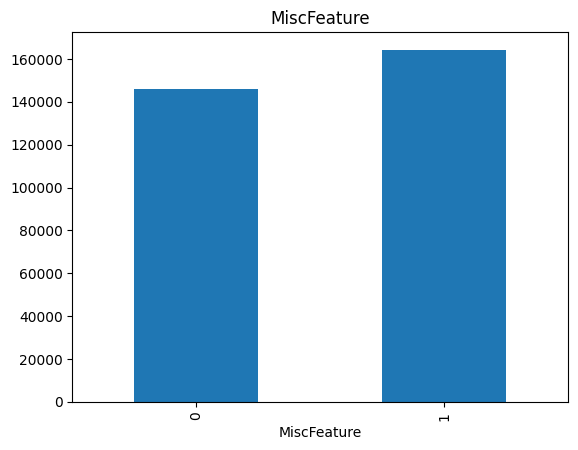

In [9]:
#lets plot disgram to see the relationship
for feature in features_with_na:
    data = df.copy()

    #let's make variables to indicates 1 if an observation contain NaN or 0 if not
    data[feature] = np.where(data[feature].isna(), 1, 0)

    #let's calculate the mean Sales Price where the information is missing or present
    data.groupby([feature])['SalePrice'].median().plot.bar()
    plt.title(feature)
    plt.show()

Above we can see the relationship between missing values and SalePrice(target vaiable).So we need to replace missing values with something meaningfull which we are going to do in feature engineering part

From the datset id feature is not required 

In [10]:
"Count of Ids of houses: {}".format(len(df.Id))

'Count of Ids of houses: 1460'

## Numerical Variables

In [11]:
#list of numerical variables
numerical_features = [features for features in df.columns if df[features].dtypes != 'object']

print('Number of numerical_features:', len(numerical_features),'\n')

df[numerical_features].head()

Number of numerical_features: 38 



,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


### Temporal Variables(Eg: Datetime variables)

From the dataset we have 4 year variables

In [12]:
#list of variables that contain year information
year_feature = [feature for feature in df.columns if 'Yr' in feature or 'Year' in feature]
year_feature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [13]:
#let's see the content in the year variables
print(df[year_feature].sample(5),"\n")

for feature in year_feature:
    print(feature,'\n',df[feature].unique())

      YearBuilt  YearRemodAdd  GarageYrBlt  YrSold
1339       1972          1972       1972.0    2006
630        1880          1991       1937.0    2006
672        1977          1977       1977.0    2006
1336       1973          1973       1973.0    2008
19         1958          1965       1958.0    2009 

YearBuilt 
 [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]
YearRemodAdd 
 [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997

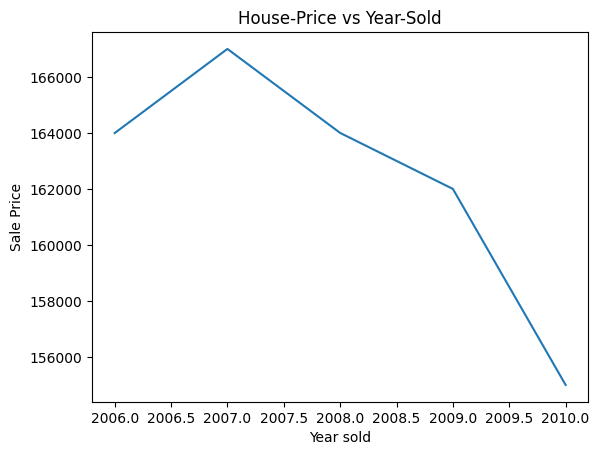

In [14]:
#let's analyze the temporal datetime variables
#we will relation between temporal variables and SalePrice (target variable)

df.groupby(['YrSold'])['SalePrice'].median().plot()
plt.title('House-Price vs Year-Sold')
plt.xlabel('Year sold')
plt.ylabel('Sale Price')
plt.show()

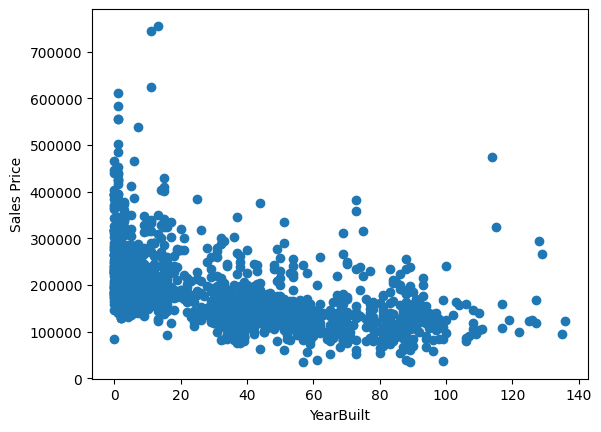

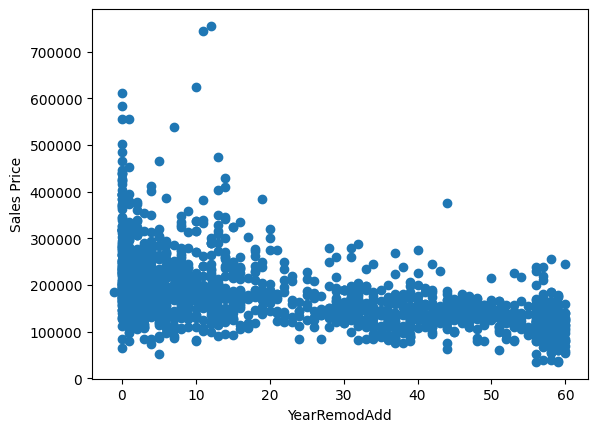

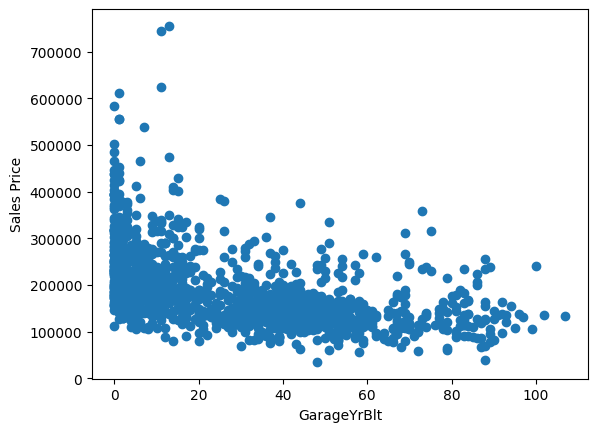

In [15]:
#let's compare difference the between (All year features & 'YrSold') with SalePrice

for feature in year_feature:
    if feature!='YrSold':
        data=df.copy()
        
        #le's get the difference of (All year features & 'YrSold') 
        data[feature]=data['YrSold']-data[feature]
        
        #let's plot the scatter plot
        plt.scatter(data[feature],data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('Sales Price')
        plt.show()

In [16]:
#Numerical features ore of 2 types
#1.Continues variable
#2.Discrete variable

discerete_feature = [feature for feature in numerical_features if len(df[feature].unique()) < 25 and feature not in year_feature+['Id']]
print('count of discerete_feature:',len(discerete_feature))

count of discerete_feature: 17


In [17]:
discerete_feature

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold']

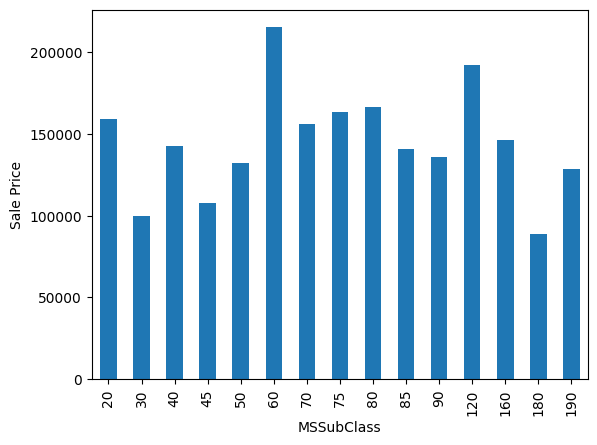

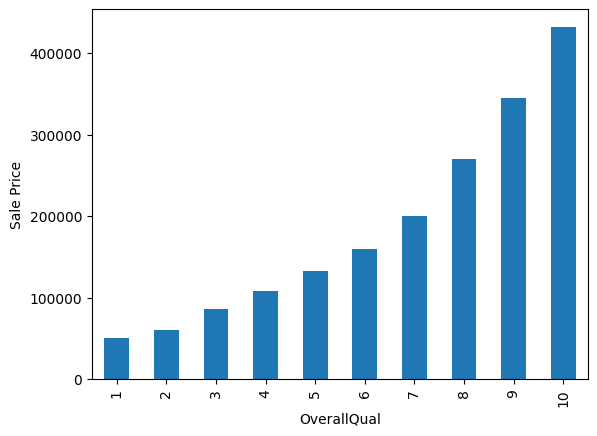

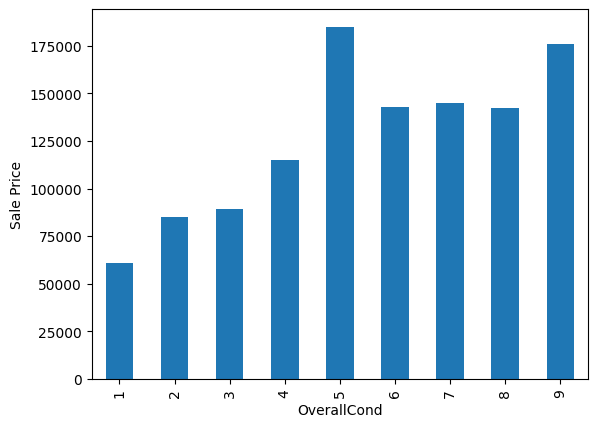

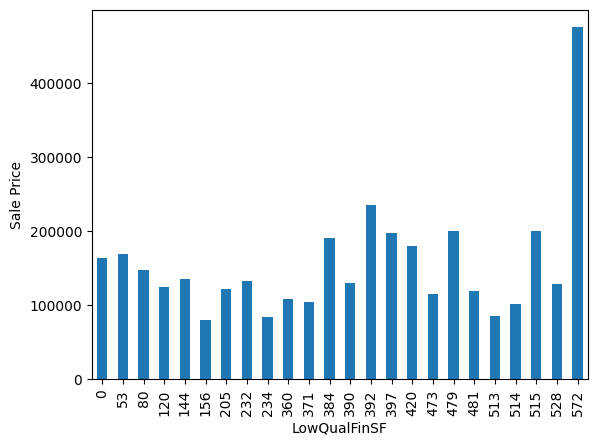

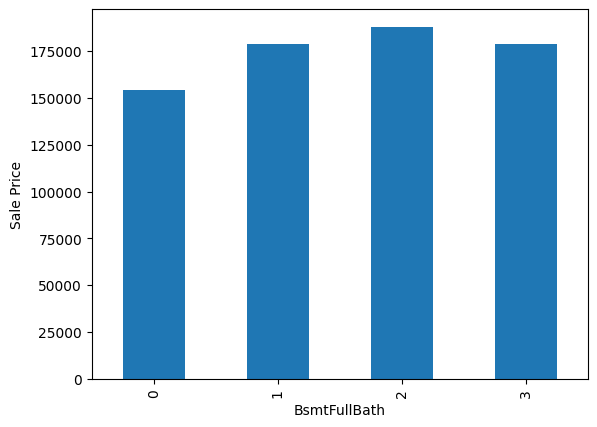

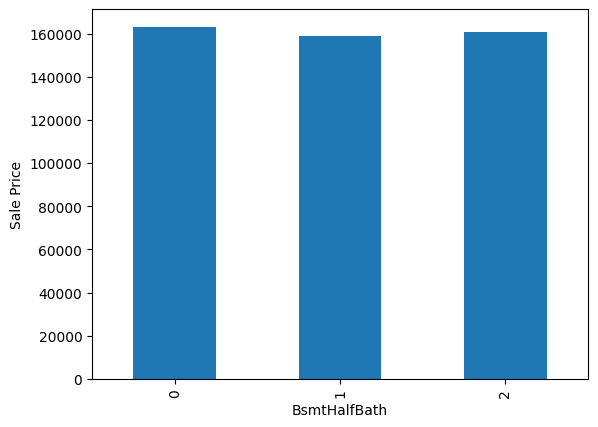

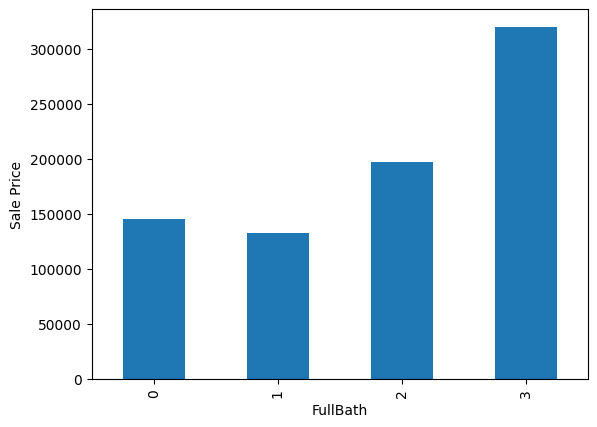

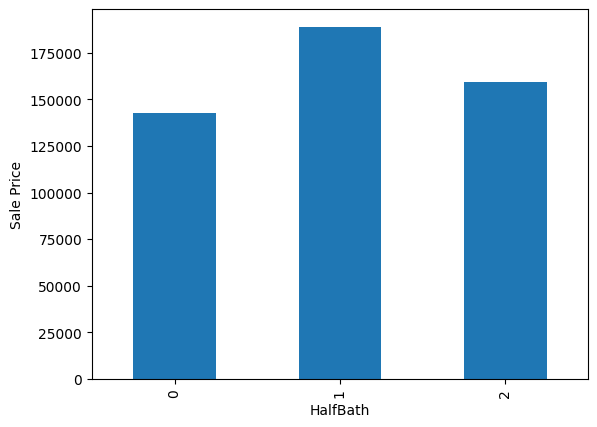

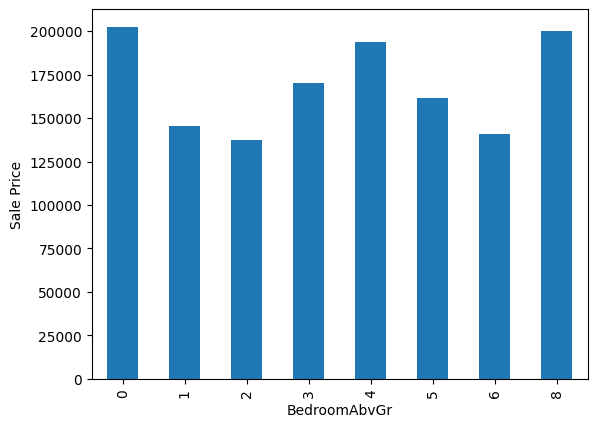

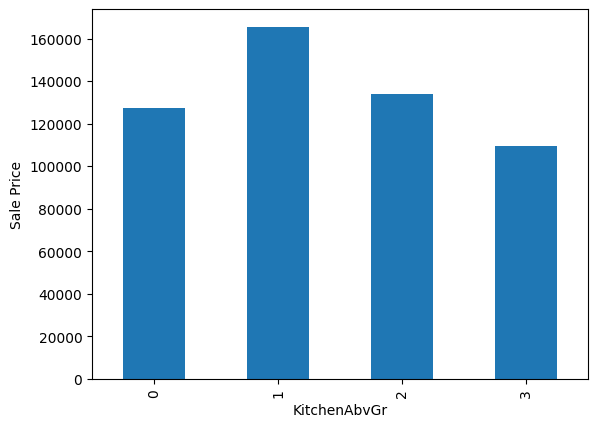

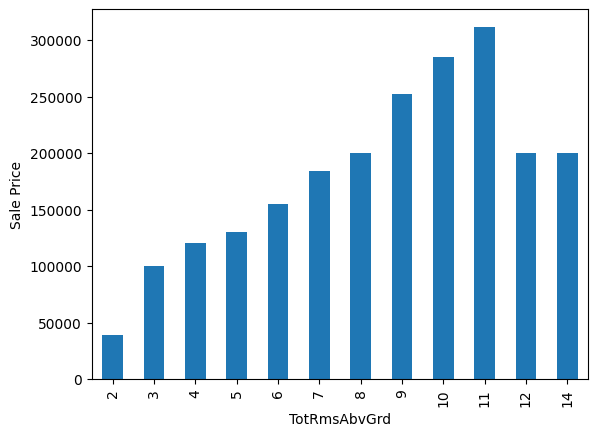

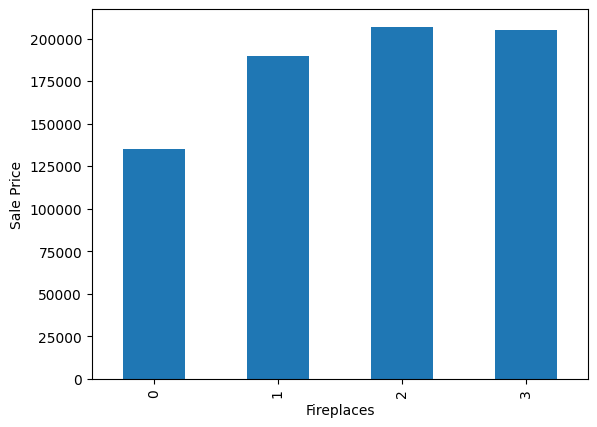

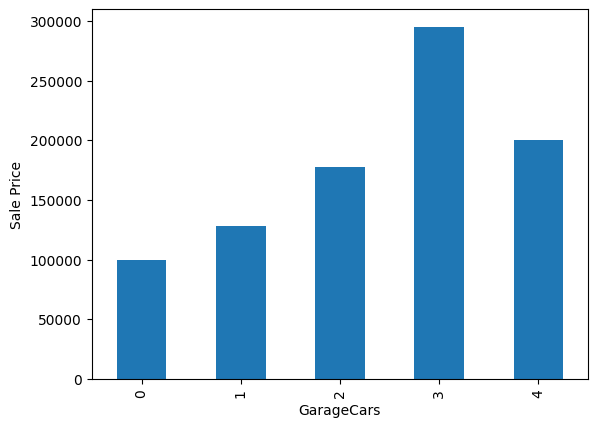

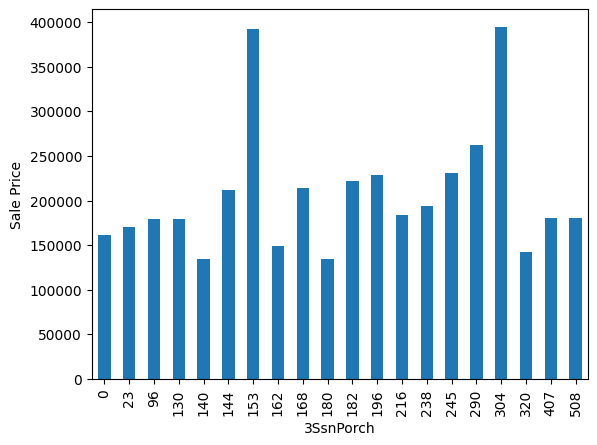

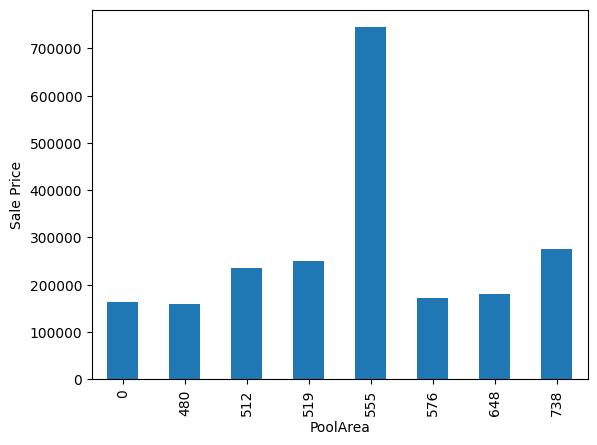

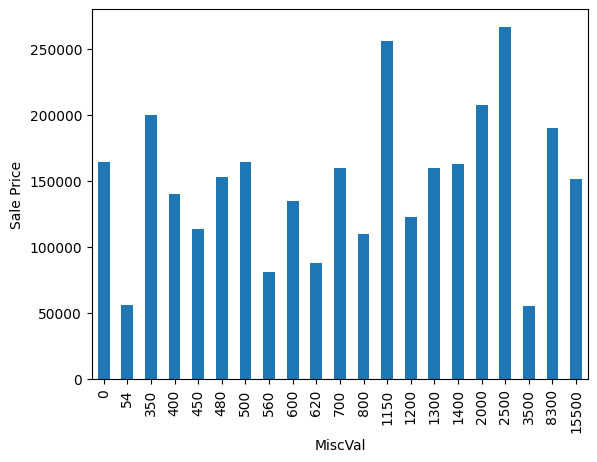

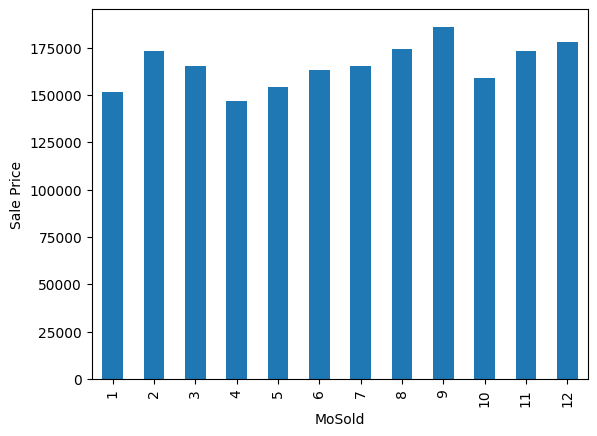

In [18]:
#let's find the relationship with discrete_features and sales Price
for feature in discerete_feature:
    data=df.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Sale Price')
    plt.show()

## Continuous Variables

In [19]:
continuous_features = [feature for feature in numerical_features if feature not in discerete_feature+year_feature+['Id']]
print('count of continuous_features:',len(continuous_features))

count of continuous_features: 16


In [20]:
continuous_features

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'SalePrice']

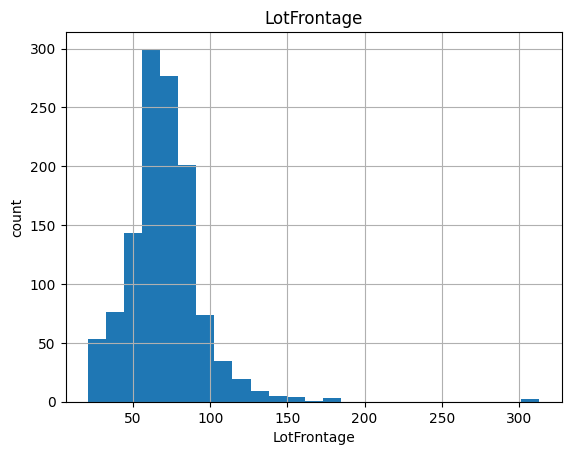

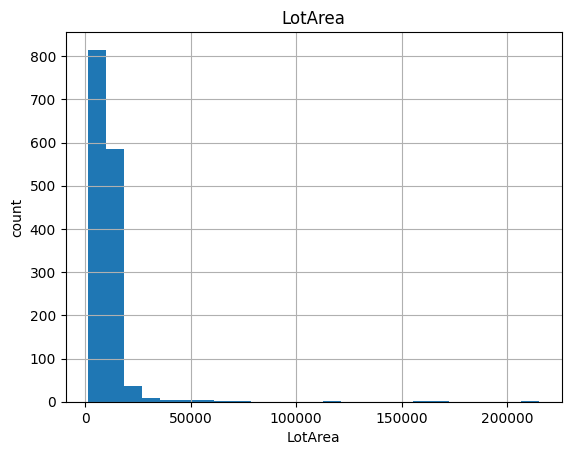

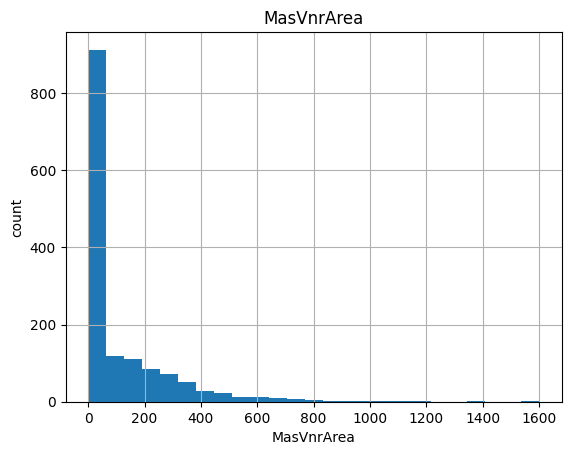

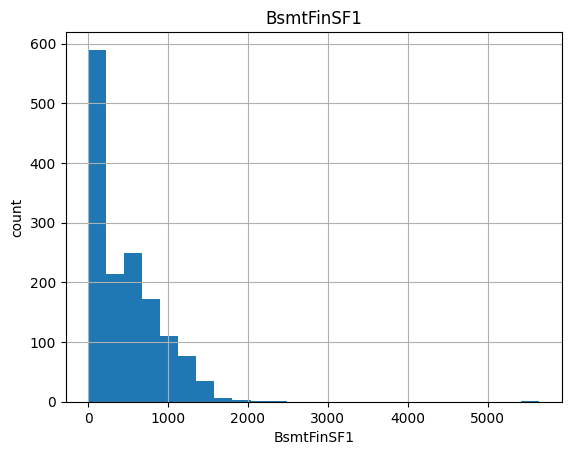

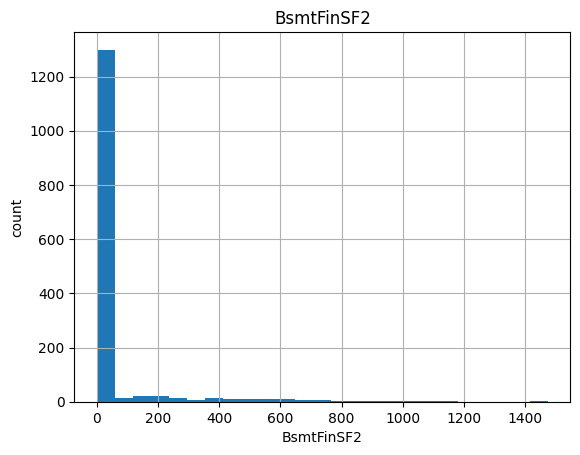

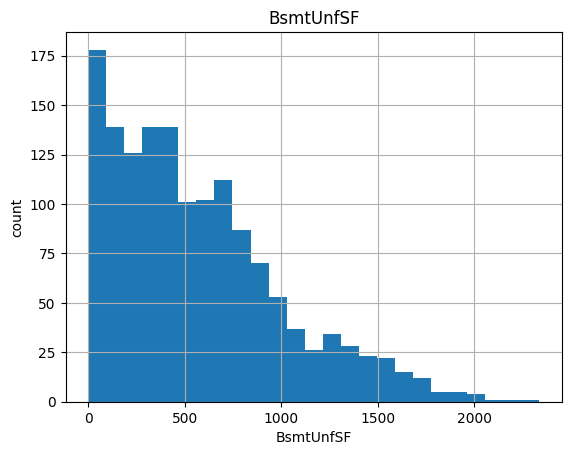

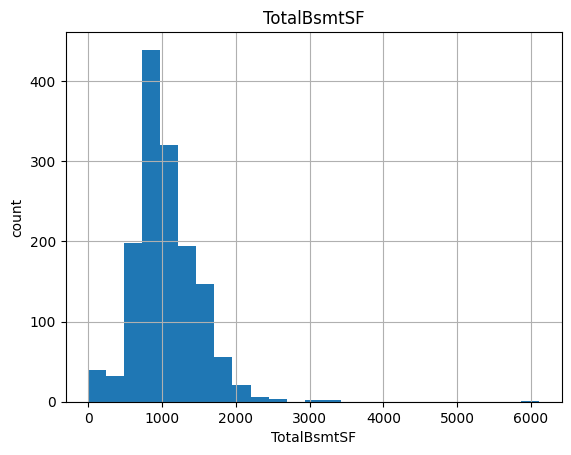

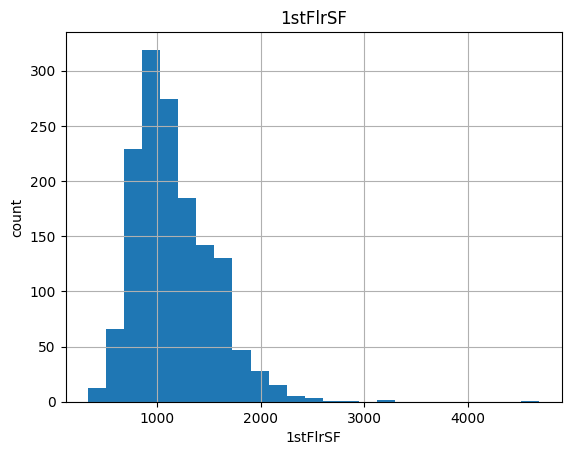

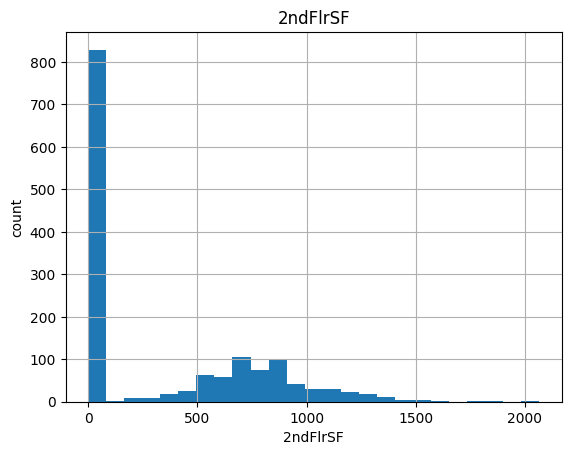

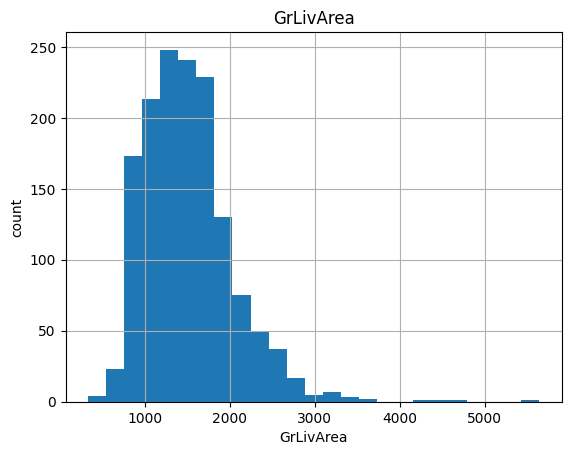

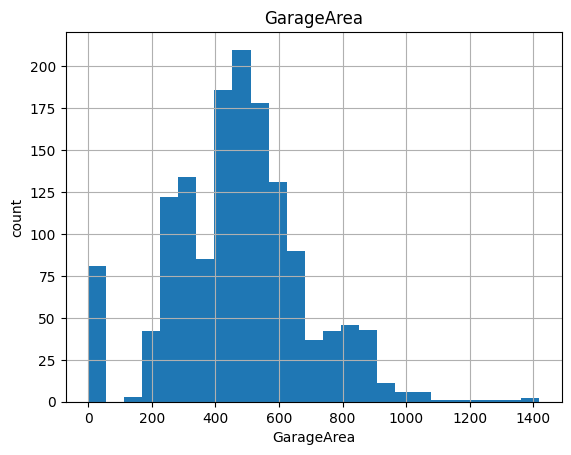

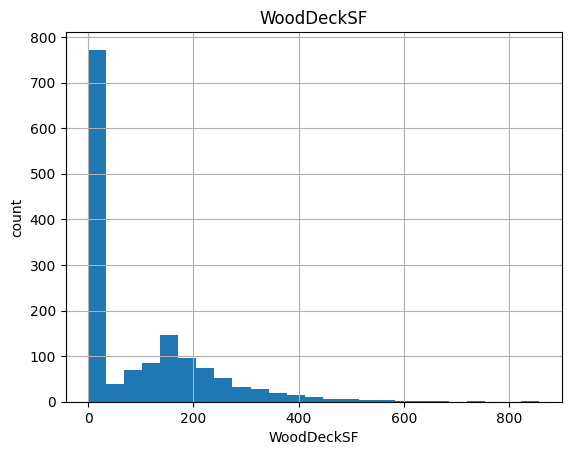

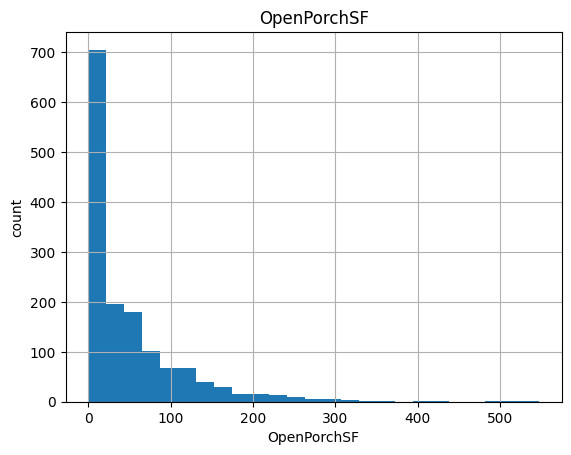

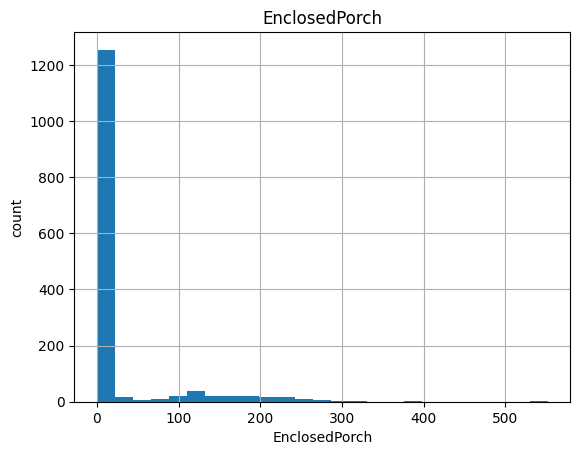

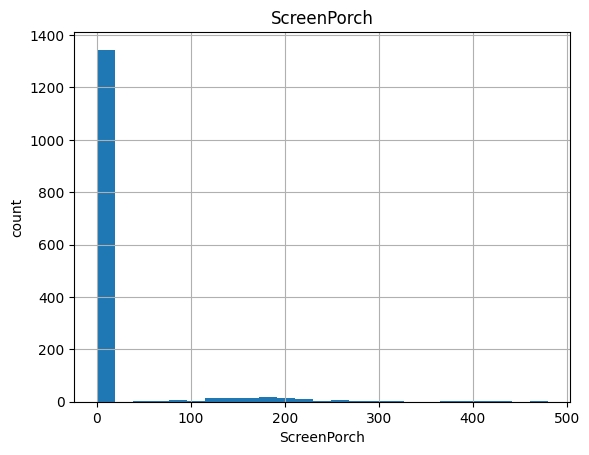

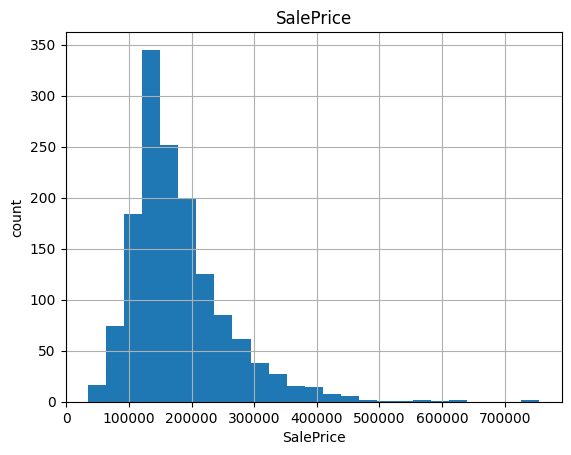

In [21]:
#let's analyze the continuous values by plotting histograms to see the distribution

for feature in continuous_features:
    data=df.copy()
    
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel('count')
    plt.title(feature)
    plt.show()

Since, most of the continuous features are skewed (and not normally distributed),
we will be using logarithmic transformation

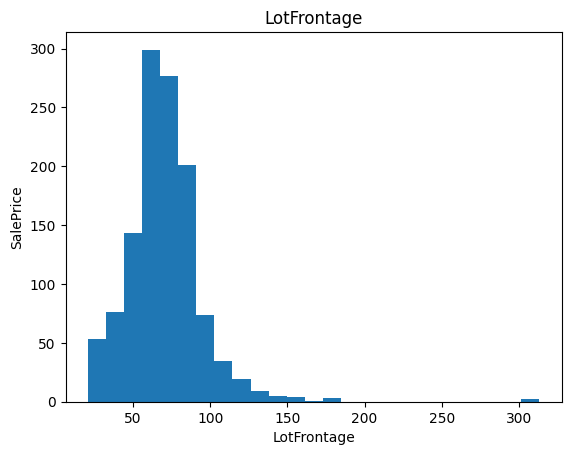

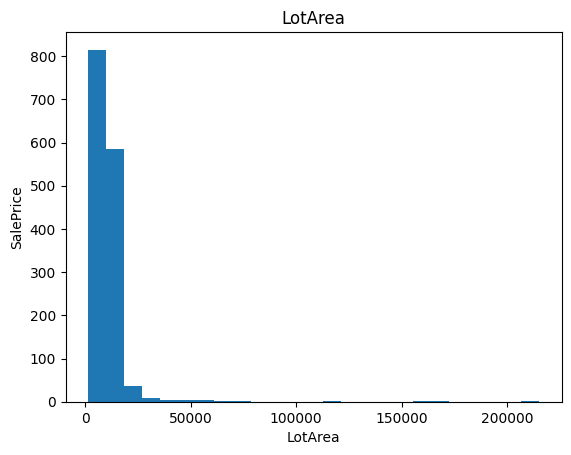

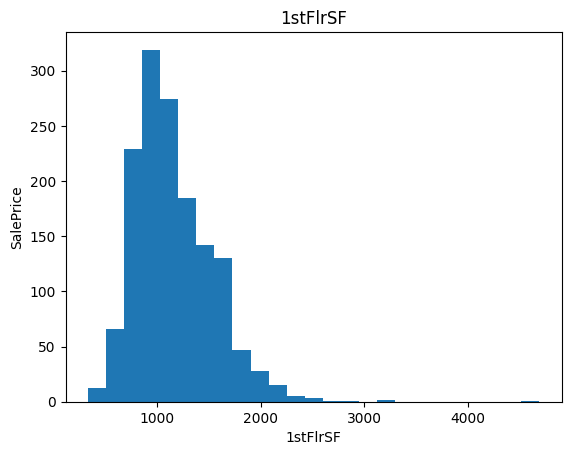

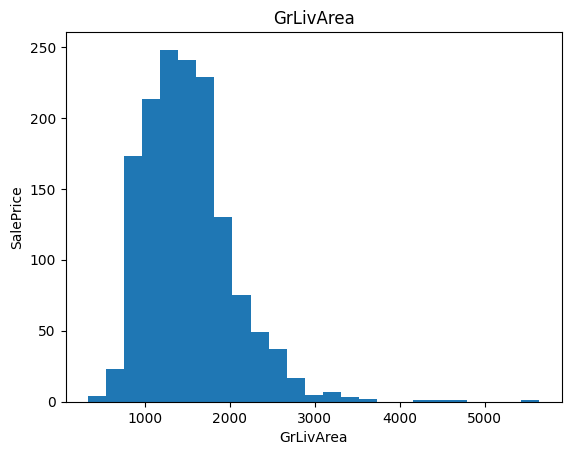

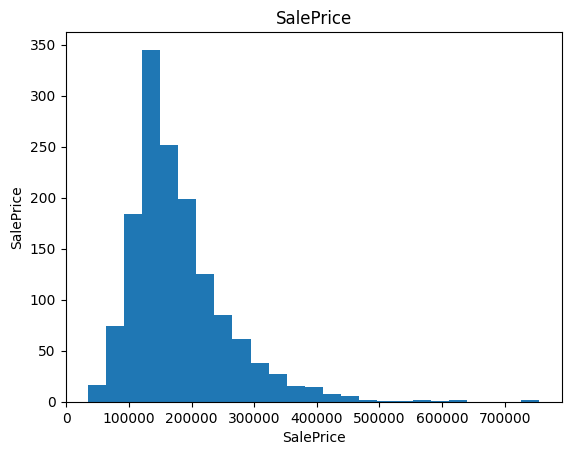

In [22]:
#logarithmic transformation

for feature in continuous_features:
    data=df.copy()
    
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data['SalePrice']=np.log(data['SalePrice'])
        #plt.scatter(data[feature],data['SalePrice'])
        plt.hist(df[feature],bins=25)
        plt.xlabel(feature)
        plt.ylabel('SalePrice')
        plt.title(feature)
        plt.show()
        

### Outliers

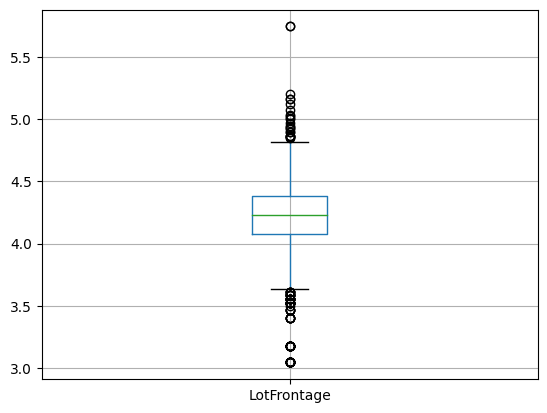

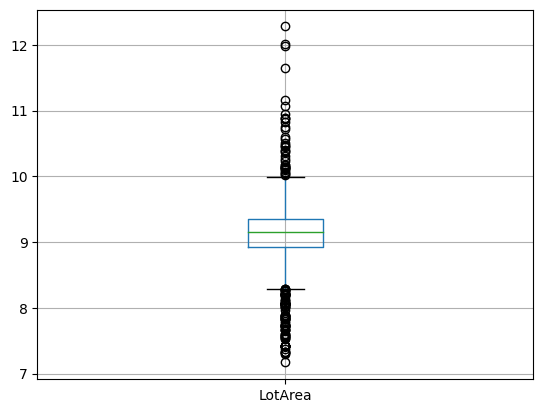

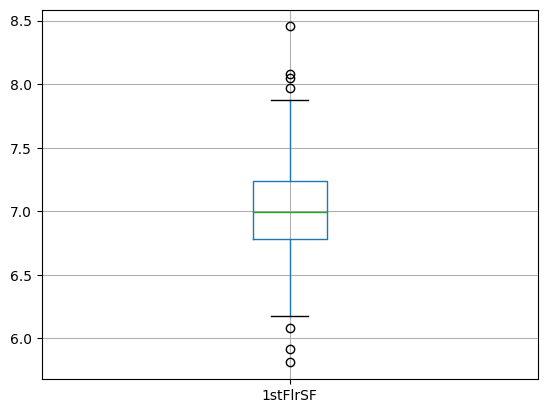

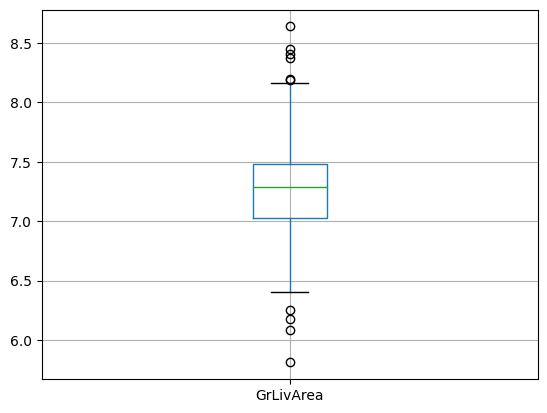

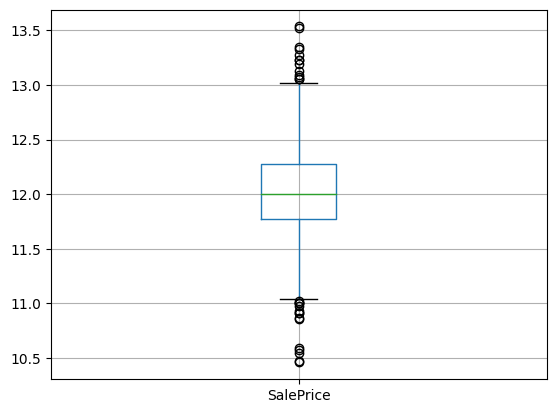

In [23]:
for feature in continuous_features:
    data=df.copy()
    
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        #sns.boxplot(y=data[feature])
        plt.show()

### Categorical Variables

In [24]:
categorical_features = [feature for feature in df.columns if df[feature].dtypes == 'object']
print('Count of categorical_features:', len(categorical_features))

Count of categorical_features: 43


In [25]:
categorical_features

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [26]:
df[categorical_features].sample(10)

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
387,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,SLvl,Hip,CompShg,MetalSd,MetalSd,BrkFace,TA,TA,CBlock,TA,TA,Av,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Fa,Detchd,Unf,TA,TA,Y,NaN,GdWo,NaN,WD,Abnorml
1310,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,PosA,Norm,1Fam,1Story,Gable,CompShg,BrkFace,HdBoard,None,Gd,Gd,PConc,Gd,TA,Av,GLQ,Unf,GasA,TA,Y,SBrkr,Ex,Typ,TA,Attchd,Fin,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1064,RL,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,Plywood,Plywood,BrkFace,TA,TA,CBlock,TA,TA,Mn,BLQ,Rec,GasA,Ex,Y,SBrkr,TA,Typ,Po,Attchd,RFn,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1349,RM,Pave,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,2Story,Gable,CompShg,MetalSd,MetalSd,None,TA,Gd,BrkTil,TA,Fa,No,LwQ,Unf,OthW,Fa,N,SBrkr,TA,Typ,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,WD,Normal
1127,RL,Pave,NaN,IR3,Lvl,AllPub,Corner,Gtl,Gilbert,Norm,Norm,1Fam,1Story,Hip,CompShg,VinylSd,VinylSd,None,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Gd,Attchd,Fin,TA,TA,Y,NaN,NaN,NaN,WD,Family
1143,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,Gable,CompShg,Wd Sdng,Plywood,None,TA,TA,CBlock,TA,TA,No,GLQ,Unf,GasA,TA,Y,SBrkr,TA,Typ,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,WD,Normal
1360,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,SWISU,Feedr,Norm,1Fam,2Story,Gable,CompShg,MetalSd,Wd Sdng,None,TA,TA,BrkTil,TA,Fa,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,NaN,BuiltIn,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1044,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,PosN,Norm,1Fam,1Story,Hip,WdShngl,BrkFace,BrkFace,None,Gd,TA,PConc,Gd,TA,No,ALQ,Unf,GasA,TA,Y,SBrkr,Gd,Typ,Gd,Attchd,Fin,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1447,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1100,RL,Pave,NaN,Reg,Bnk,AllPub,Inside,Gtl,SWISU,Norm,Norm,1Fam,1Story,Gable,CompShg,Wd Sdng,Wd Sdng,None,TA,TA,CBlock,TA,Fa,No,Rec,Unf,GasA,TA,N,FuseF,Fa,Typ,NaN,Detchd,Unf,TA,TA,N,NaN,NaN,NaN,WD,Normal


In [27]:
#how many unique categories does each categorical feature contain
for feature in categorical_features:
    print(feature,'contains->',df[feature].nunique(),'unique categories')

MSZoning contains-> 5 unique categories
Street contains-> 2 unique categories
Alley contains-> 2 unique categories
LotShape contains-> 4 unique categories
LandContour contains-> 4 unique categories
Utilities contains-> 2 unique categories
LotConfig contains-> 5 unique categories
LandSlope contains-> 3 unique categories
Neighborhood contains-> 25 unique categories
Condition1 contains-> 9 unique categories
Condition2 contains-> 8 unique categories
BldgType contains-> 5 unique categories
HouseStyle contains-> 8 unique categories
RoofStyle contains-> 6 unique categories
RoofMatl contains-> 8 unique categories
Exterior1st contains-> 15 unique categories
Exterior2nd contains-> 16 unique categories
MasVnrType contains-> 4 unique categories
ExterQual contains-> 4 unique categories
ExterCond contains-> 5 unique categories
Foundation contains-> 6 unique categories
BsmtQual contains-> 4 unique categories
BsmtCond contains-> 4 unique categories
BsmtExposure contains-> 4 unique categories
BsmtFinTy

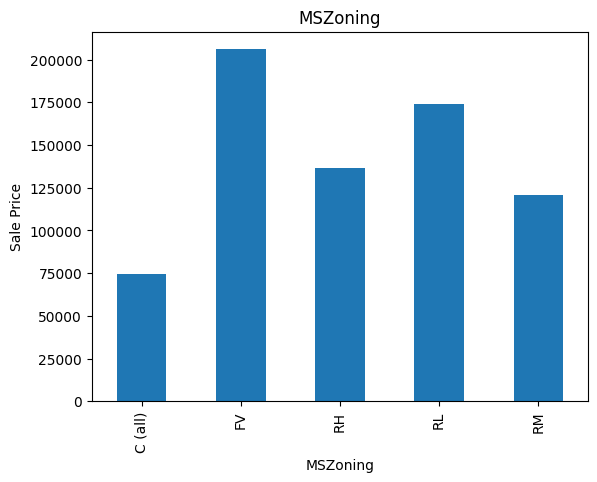

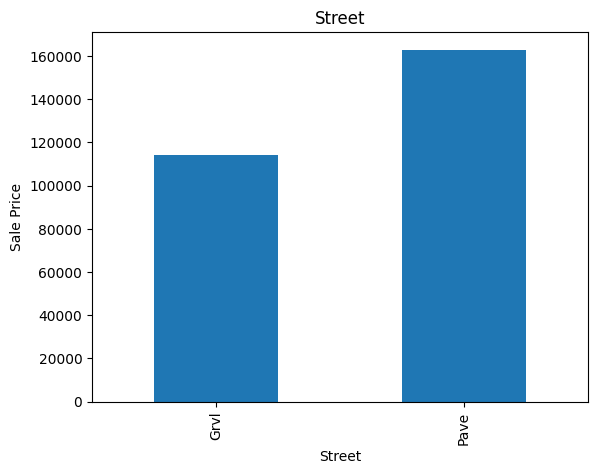

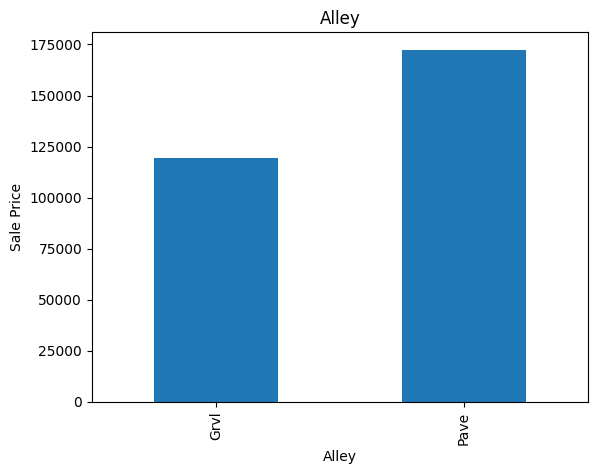

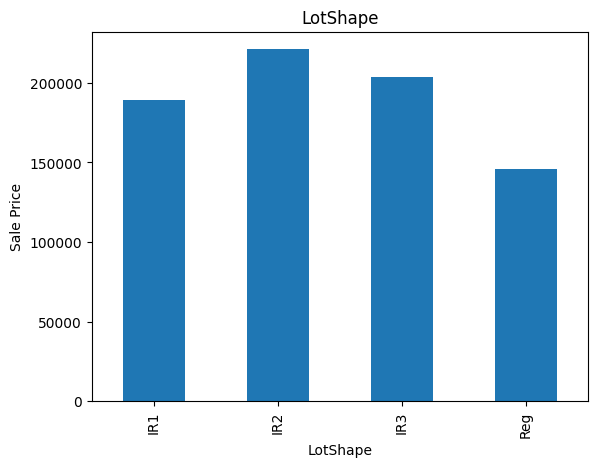

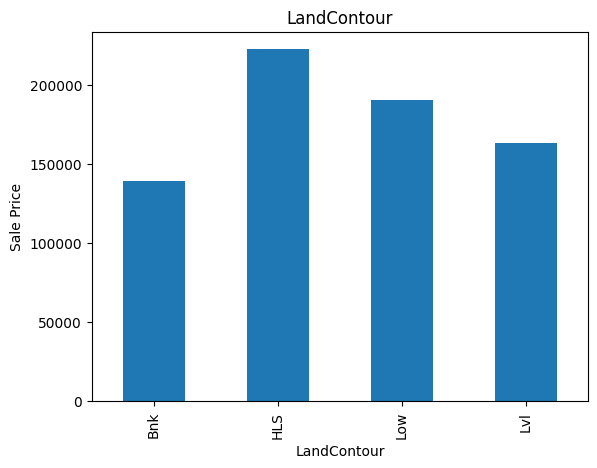

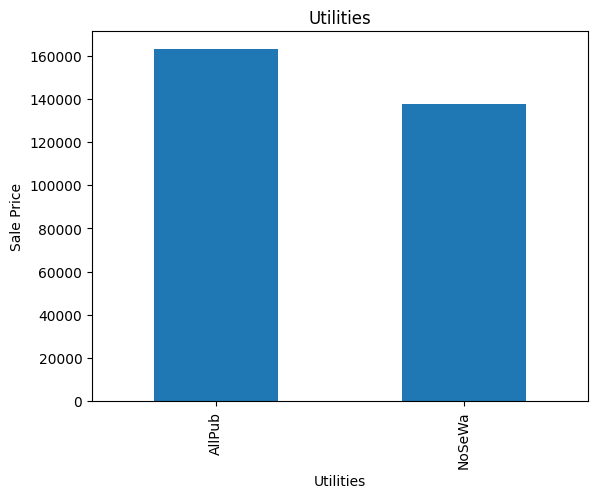

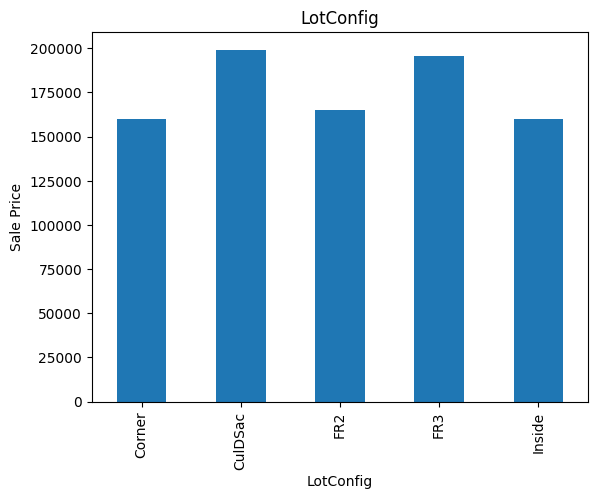

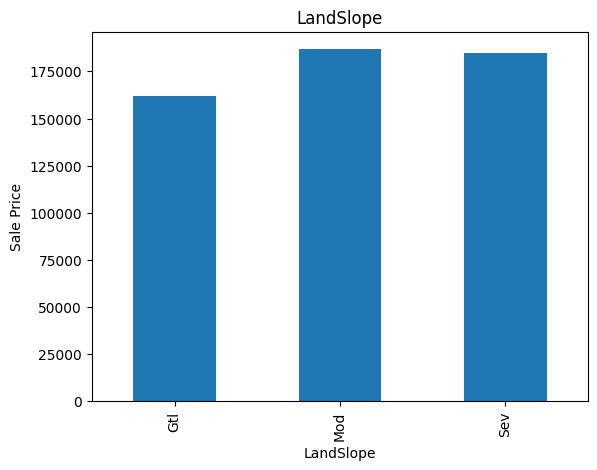

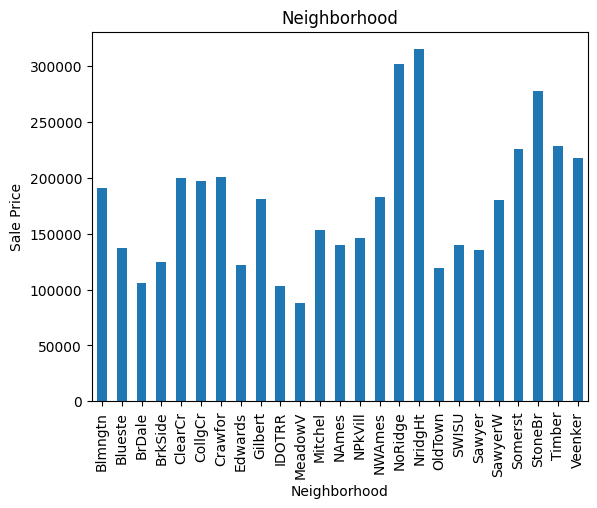

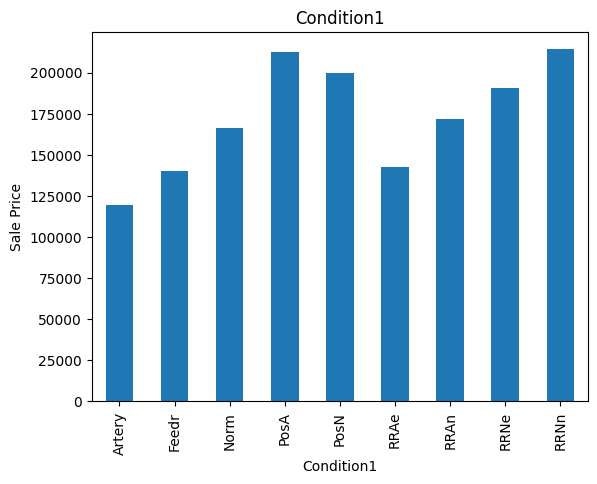

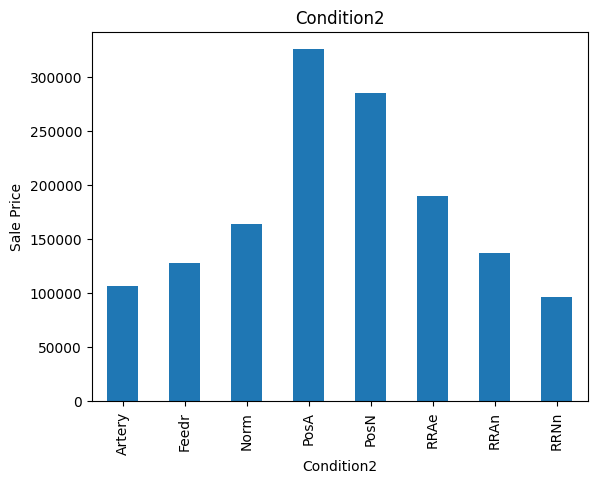

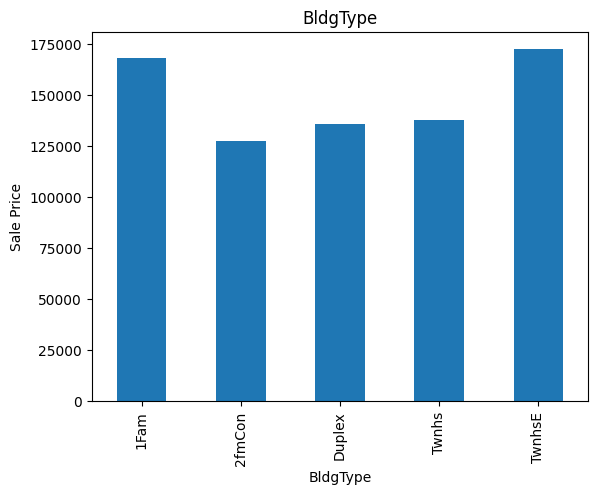

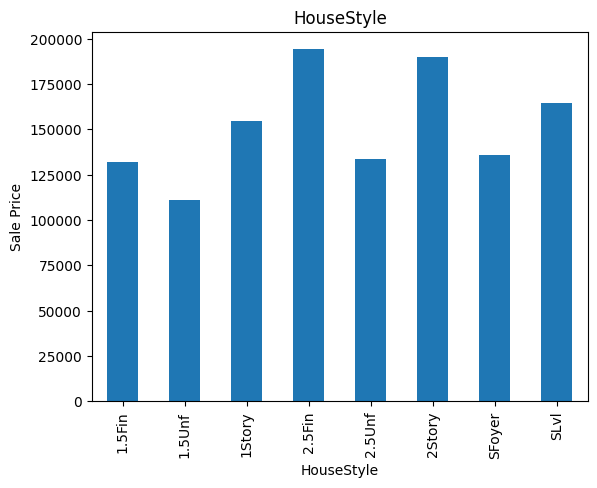

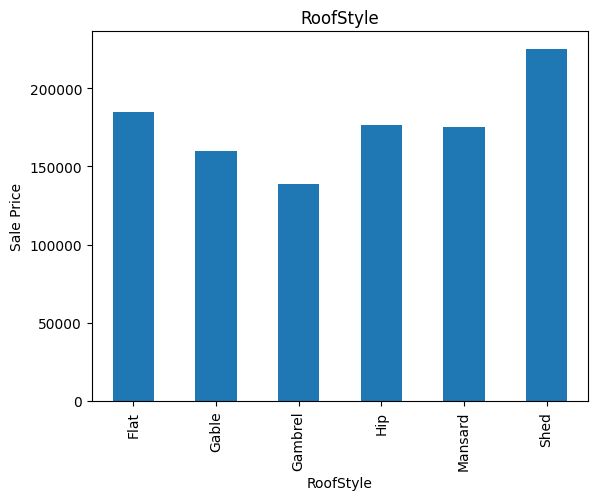

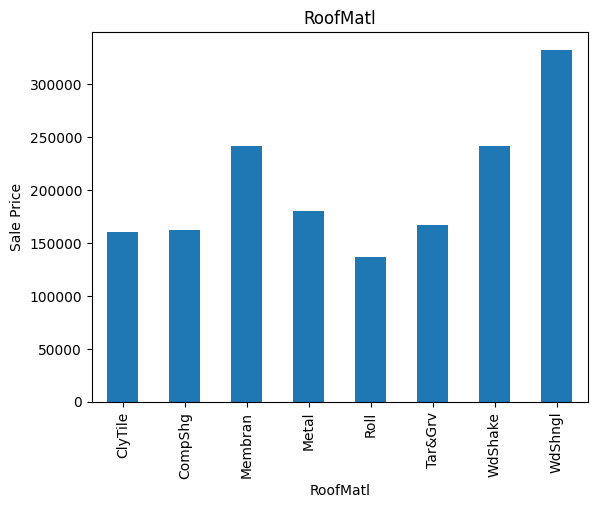

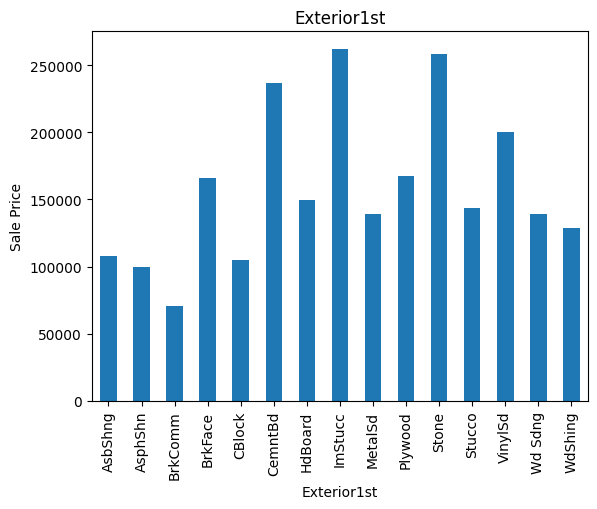

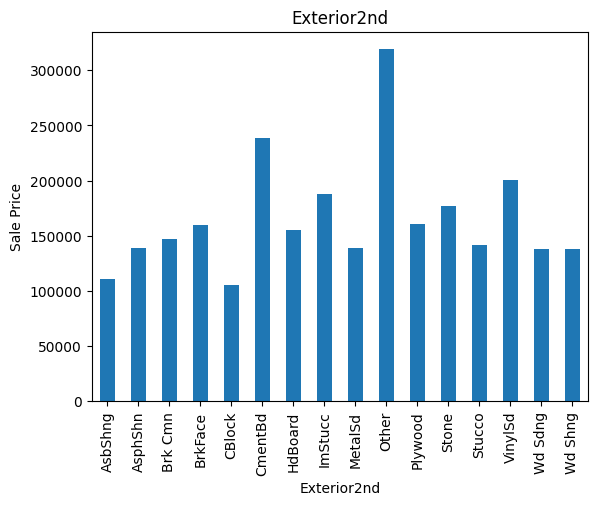

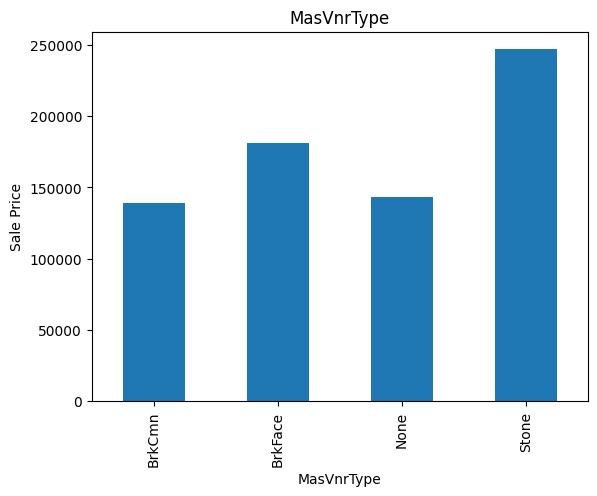

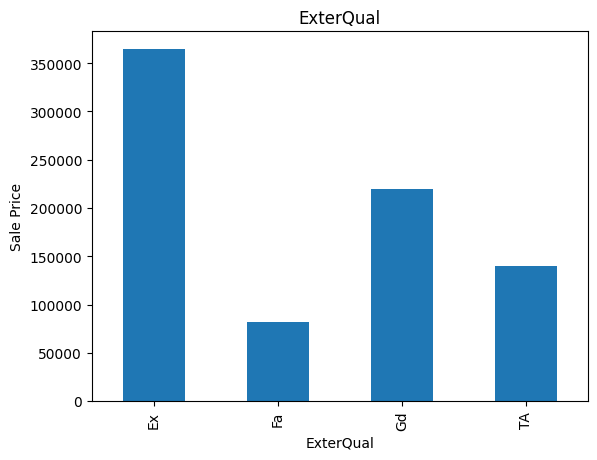

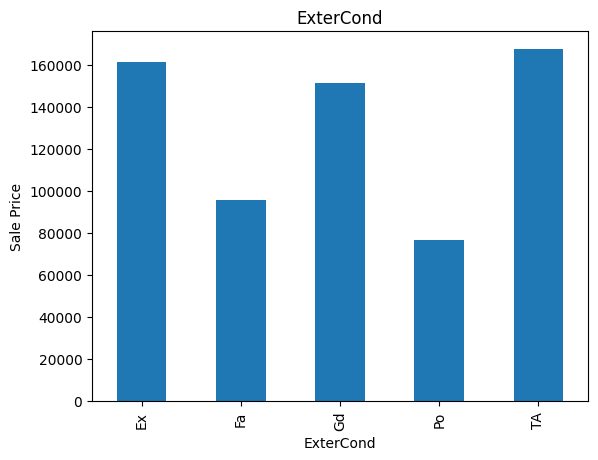

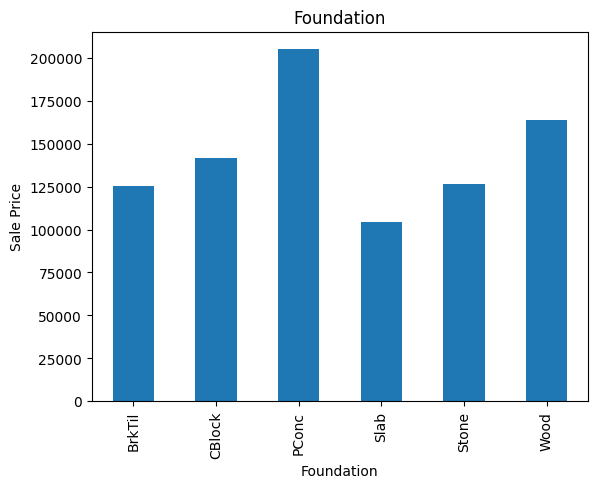

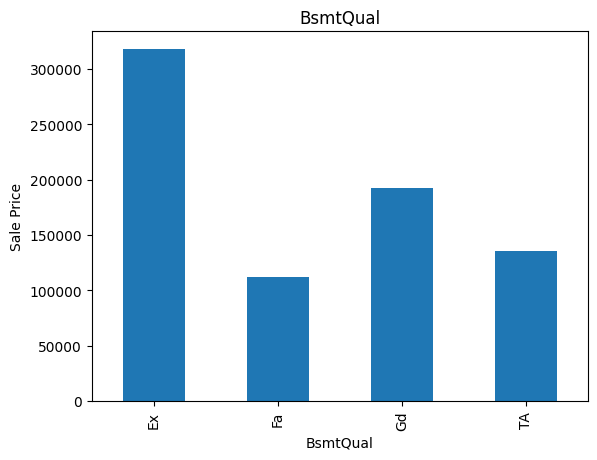

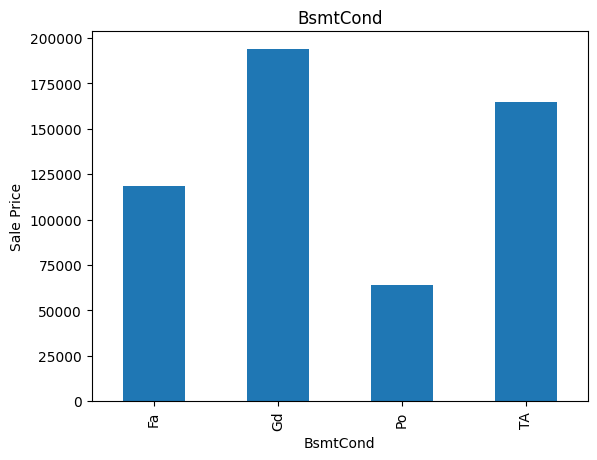

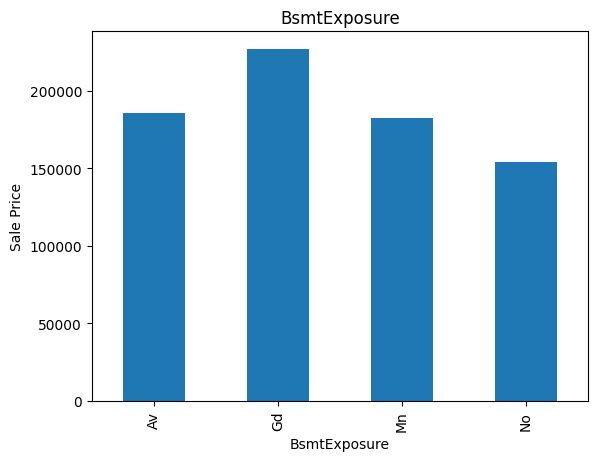

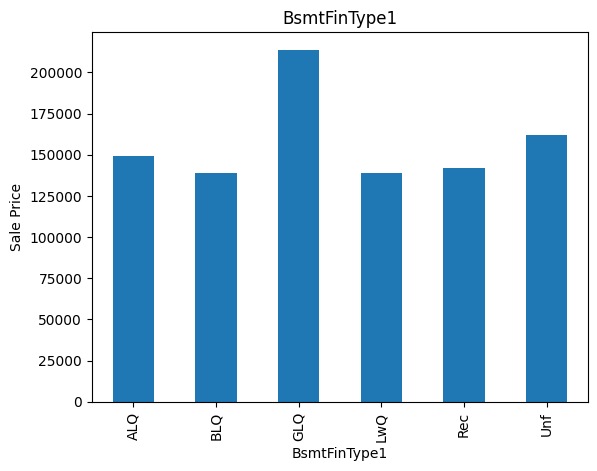

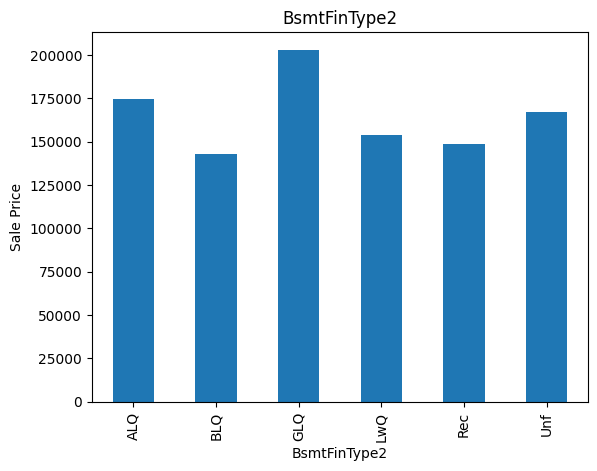

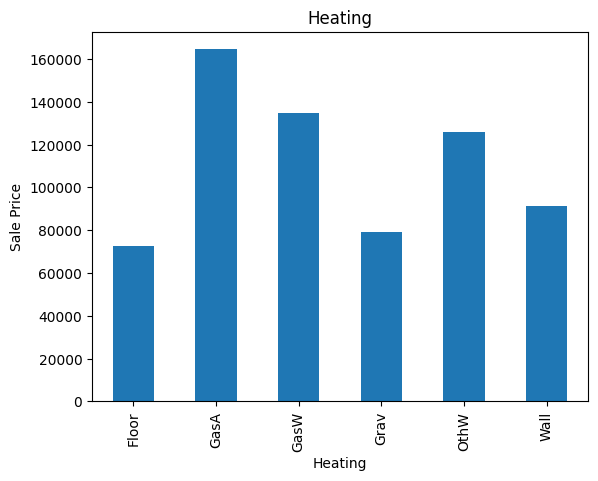

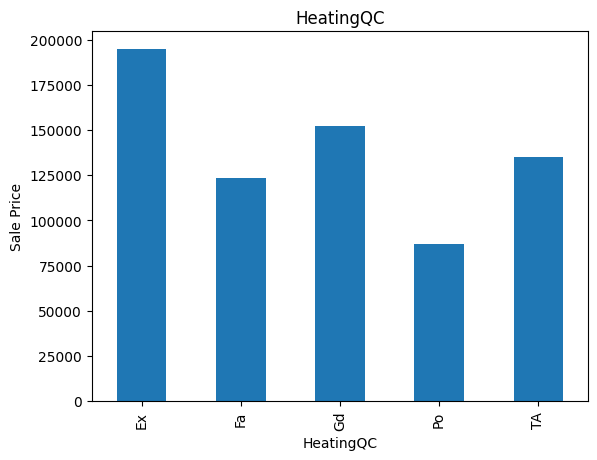

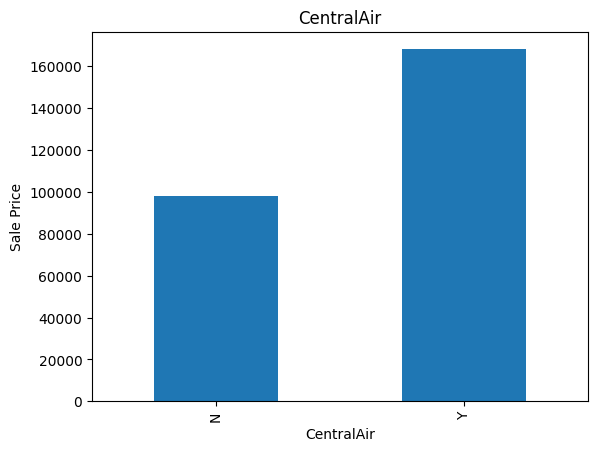

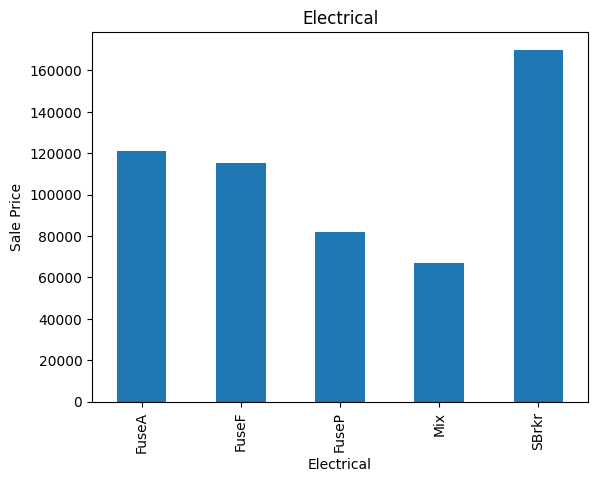

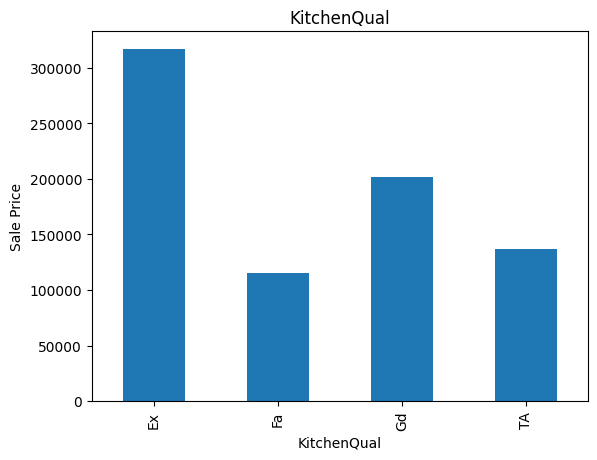

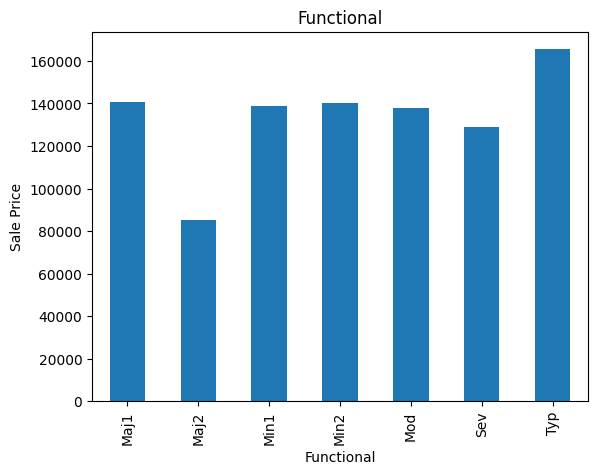

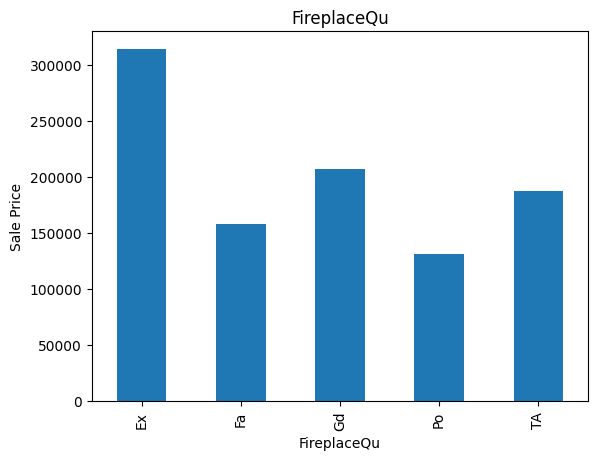

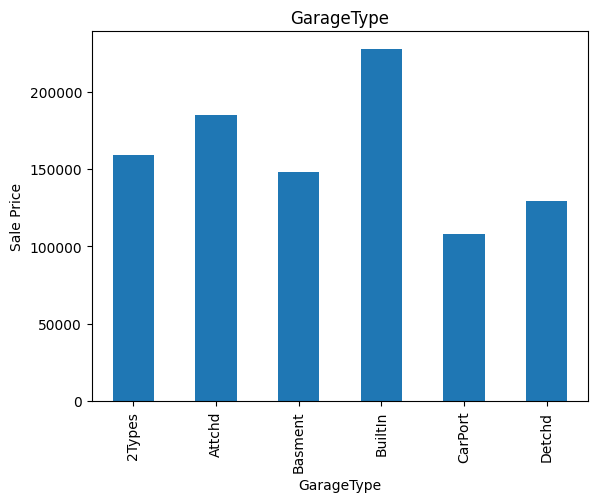

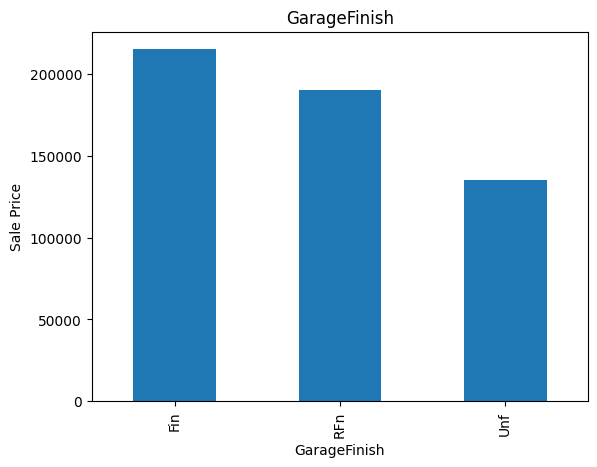

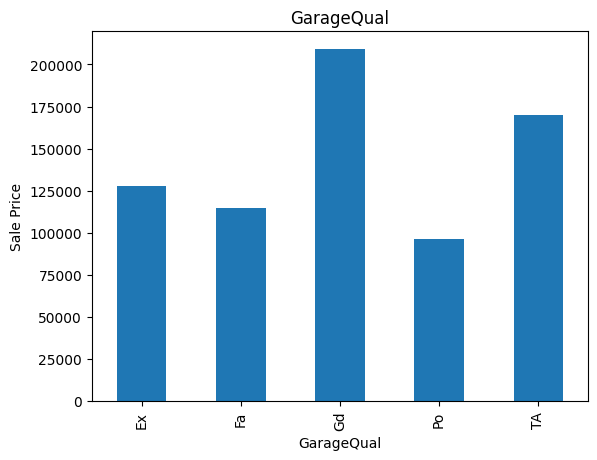

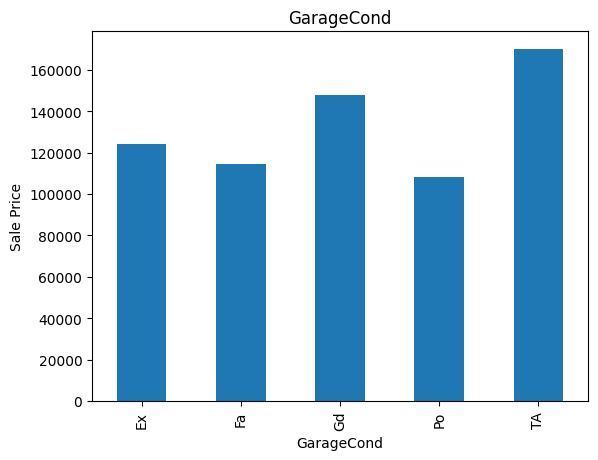

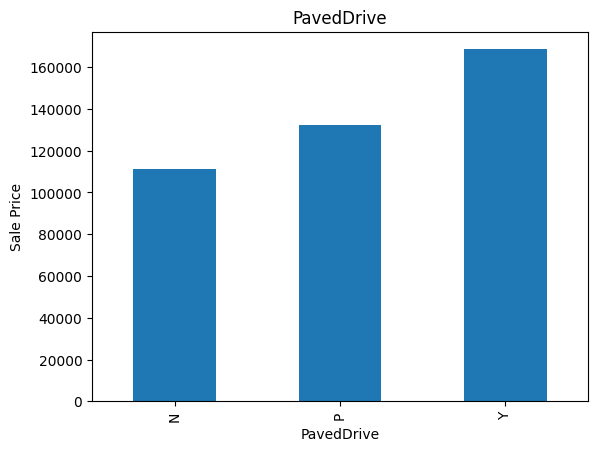

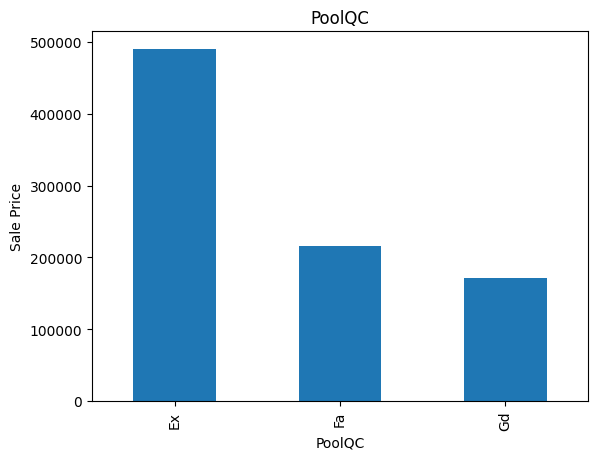

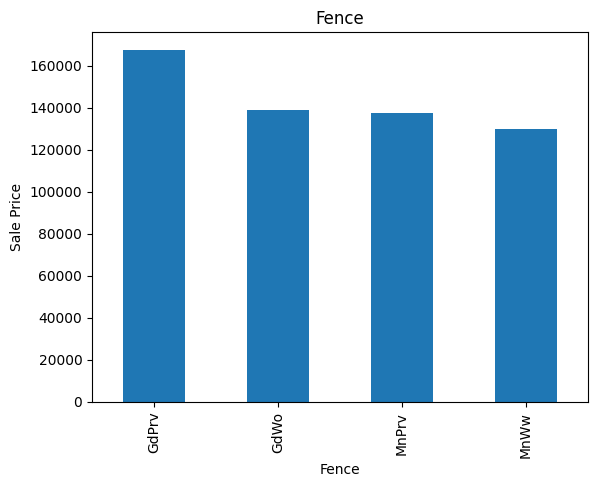

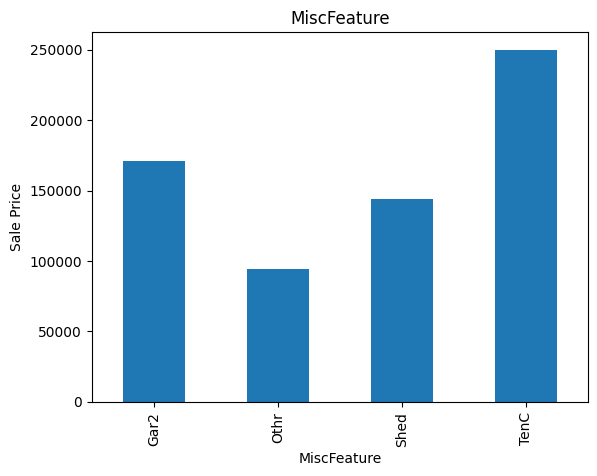

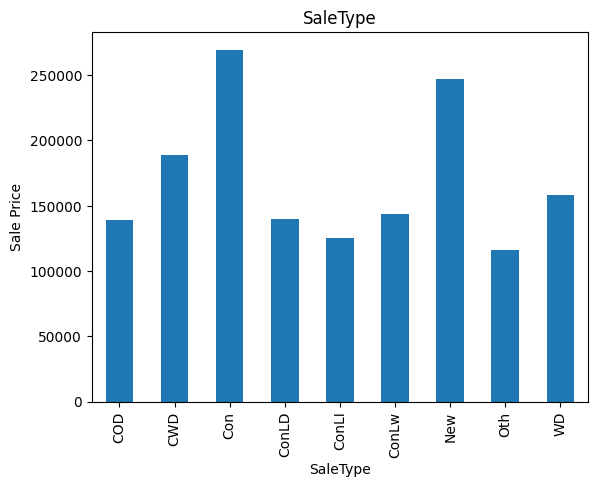

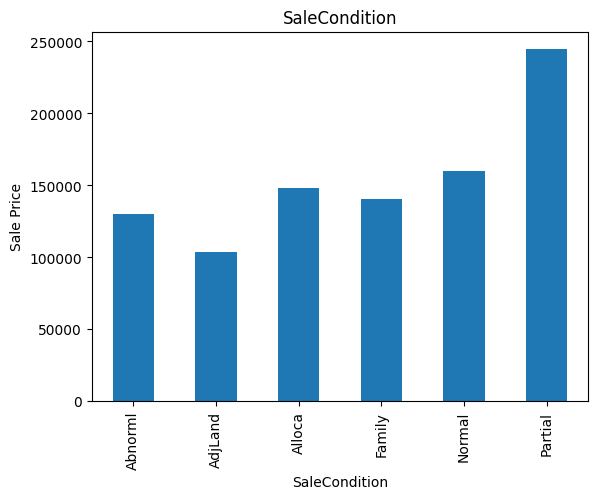

In [31]:
#findout relation between categorical features and SalePrice
for feature in categorical_features:
    data=df.copy()
    data.groupby([feature])['SalePrice'].median().plot(kind='bar')
    plt.xlabel(feature)
    plt.ylabel('Sale Price')
    plt.title(feature)
    plt.show()
    
    